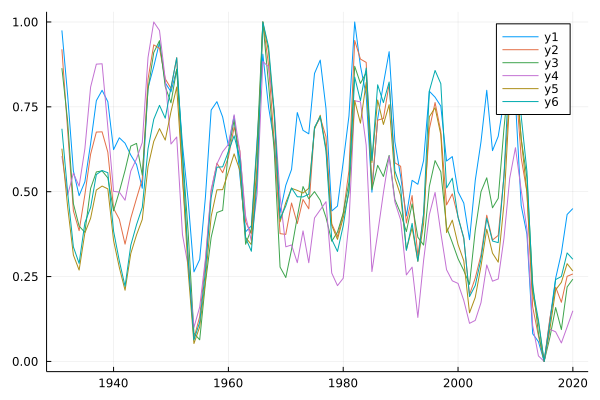

In [44]:
using Random, Distributions, DataFrames, CSV, Statistics, DelimitedFiles, Parameters, Dates, Plots, StatsBase

files = readdir("flow_data")
x = 1931:1931+90
lines = []
for file in files
    data = readdlm(joinpath("flow_data",file), '\t', Float64)
    means = vec(mean(data,dims=2))
    push!(lines, standardize(UnitRangeTransform, movingaverage(means,3)))
end
plot(1931:2020, lines)

In [64]:
flow = 0
for name in ["paraibuna","sta_branca","jaguari","funil","sta_cecilia"]
    flow += mean(readdlm(joinpath("flow_data",name*".csv"), '\t', Float64)[end-20:end,:])
end
flow

615.6031746031747

In [15]:
function movingaverage(X::Vector,numofele::Int)
    BackDelta = div(numofele,2) 
    ForwardDelta = isodd(numofele) ? div(numofele,2) : div(numofele,2) - 1
    len = length(X)
    Y = similar(X)
    for n = 1:len
        lo = max(1,n - BackDelta)
        hi = min(len,n + ForwardDelta)
        Y[n] = mean(X[lo:hi])
    end
    return Y
end

movingaverage (generic function with 1 method)